# ask gpt4v
> ask gpt4v via openai api

In [ ]:
#| default_exp gpt4v

In [ ]:
#|hide
from nbdev.showdoc import *

In [ ]:
#|export
from IPython.display import Image
import base64
import glob
import json
import openai
import requests

In [ ]:
files = sorted(glob.glob("../data/cap_*.jpg"))
len(files), files[:9]

(542,
 ['../data/cap_2024.09.28_15:59:06_Presidentinlinna.jpg',
  '../data/cap_2024.09.28_16:00:11_Presidentinlinna.jpg',
  '../data/cap_2024.09.28_16:01:16_Etelasatama.jpg',
  '../data/cap_2024.09.28_16:02:21_Etelasatama.jpg',
  '../data/cap_2024.09.28_16:05:31_Olympiaterminaali.jpg',
  '../data/cap_2024.09.28_16:06:36_Olympiaterminaali.jpg',
  '../data/cap_2024.09.28_16:07:41_Torni.jpg',
  '../data/cap_2024.09.28_16:09:51_Tuomiokirkko.jpg',
  '../data/cap_2024.09.28_16:15:11_Presidentinlinna.jpg'])

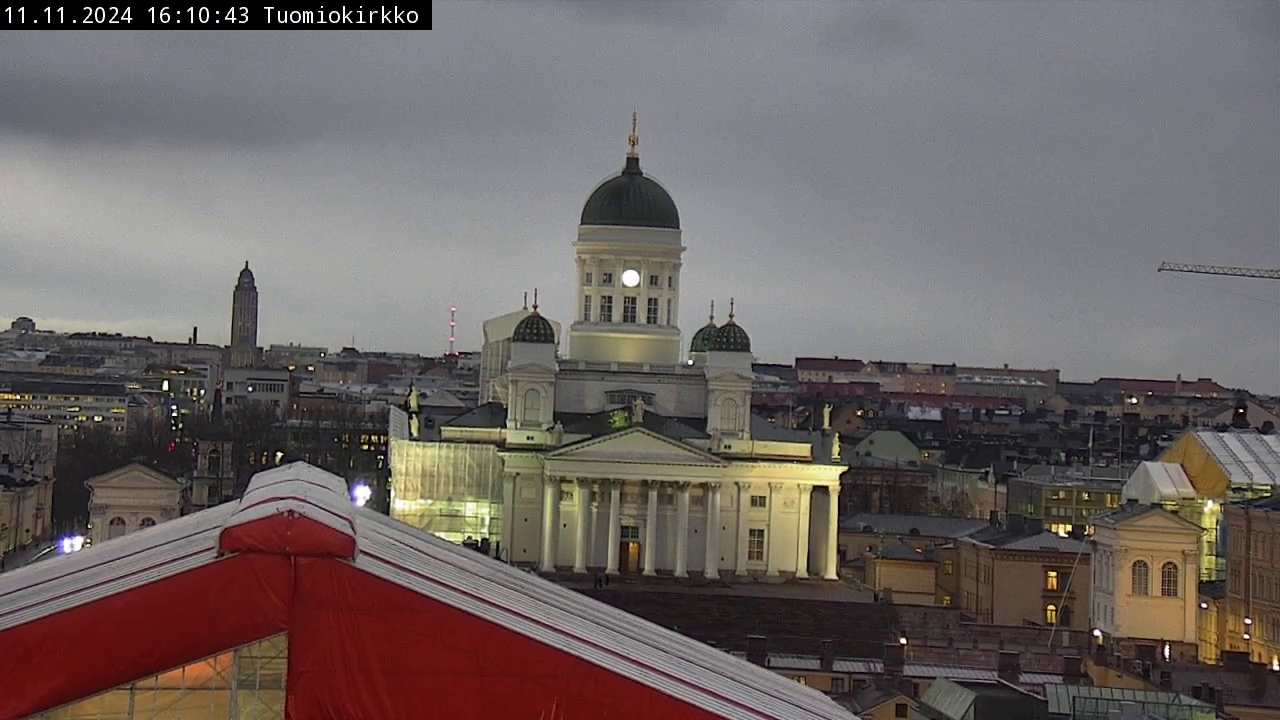

In [ ]:
Image(files[-1])

In [ ]:
#|export
def encode_image(fname: str):
    "encode an image file as base64"
    with open(fname, "rb") as f:
        return base64.b64encode(f.read()).decode('utf-8')

In [ ]:
show_doc(encode_image)

---

[source](https://github.com/ninjalabo/llmcam/blob/main/llmcam/gpt4v.py#L17){target="_blank" style="float:right; font-size:smaller"}

### encode_image

>      encode_image (fname:str)

*encode an image file as base64*

In [ ]:
base64_image = encode_image(files[0])
base64_image[:9]

'/9j/4AAQS'

In [ ]:
#|export
question = """
    Describe this image quantitatively as many as possible in json format. All the value should numbers.
    
    ##### EXAMPLE OUTPUT FORMAT
    
    {'timestamp': '2024-10-06T19:04:14',
     'location': 'Kauppatori',
     'dimensions': {'width': 1280, 'height': 720},
     'buildings': {'number_of_buildings': 10,
      'building_height_range': '3-5 stories'},
     'vehicles': {'number_of_vehicles': 5, 'types': ['cars', 'trucks'], number_of_available_parking_space: 3},
     'waterbodies': {'visible': True, 'type': 'harbor', 'number_of_boats': 4},
     'street_lights': {'number_of_street_lights': 20},
     'people': {'approximate_number': 10},
     'lighting': {'time_of_day': 'evening', 'artificial_lighting': 'prominent'},
     'visibility': {'clear': True},
     'sky': {'visible': True, 'light_conditions': 'dusk'}}
    """

In [ ]:
#| eval: false
response = openai.chat.completions.create(
  model="gpt-4o",
  messages=[{
        "role": "user",
        "content": [
            {"type": "text", "text": question,},
            {
                "type": "image_url",
                "image_url": {"url": f"data:image/jpeg;base64,{encode_image(files[-1])}", "detail":"high",},
            },
        ],
    }],
  max_tokens=300,
)

In [ ]:
#|export
def info(response):
    txt = json.loads(response.json())['choices'][0]['message']['content']
    data = json.loads(txt.replace('```json\n', "").replace('\n```', ""))
    return data

In [ ]:
#|export
def ask_gpt4v(fn:str) -> str:
    response = openai.chat.completions.create(
      model="gpt-4o",
      messages=[{
            "role": "user",
            "content": [
                {"type": "text", "text": question,},
                {
                    "type": "image_url",
                    "image_url": {"url": f"data:image/jpeg;base64,{encode_image(fn)}", "detail":"high",},
                },
            ],
        }],
      max_tokens=300,
    )
    return info(response)

In [ ]:
#| eval: false
ask_gpt4v(files[-1])
info(response)

{'timestamp': '2024-11-11T16:10:43',
 'location': 'Tuomiokirkko',
 'dimensions': {'width': 1280, 'height': 720},
 'buildings': {'number_of_buildings': 15,
  'building_height_range': '2-5 stories'},
 'vehicles': {'number_of_vehicles': 0, 'types': []},
 'waterbodies': {'visible': False, 'type': None, 'number_of_boats': 0},
 'street_lights': {'number_of_street_lights': 5},
 'people': {'approximate_number': 0},
 'lighting': {'time_of_day': 'evening', 'artificial_lighting': 'prominent'},
 'visibility': {'clear': True},
 'sky': {'visible': True, 'light_conditions': 'dusk'}}

In [ ]:
#|hide
import nbdev; nbdev.nbdev_export()